<a href="https://colab.research.google.com/github/dhruvjoshi0905/ml/blob/main/SPAM_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

In [ ]:
#Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
print("Dataset preview:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)


Dataset preview:
     v1                                                 v2 Unnamed: 2  \
0  spam                 You have won a lottery 5 day trip         NaN   
1  spam  You are a winner of poker/dream11/ludo and are...        NaN   
2   ham  Go until jurong point, crazy.. Available only ...        NaN   
3   ham                      Ok lar... Joking wif u oni...        NaN   
4  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Columns in the dataset:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# Data Preprocessing
# 'v1' contains labels and 'v2' contains messages
if 'v1' in df.columns and 'v2' in df.columns:
    df = df[['v1', 'v2']]  # Keep only relevant columns
    df.columns = ['label', 'message']  # Rename for clarity
else:
    print("Please adjust column selections based on your dataset structure")

print("\nMissing values:")
print(df.isnull().sum())


df = df.dropna()

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("\nLabel encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")


Missing values:
label      0
message    0
dtype: int64

Label encoding mapping:
ham -> 0
spam -> 1



Class distribution:
label
ham     4825
spam     749
Name: count, dtype: int64


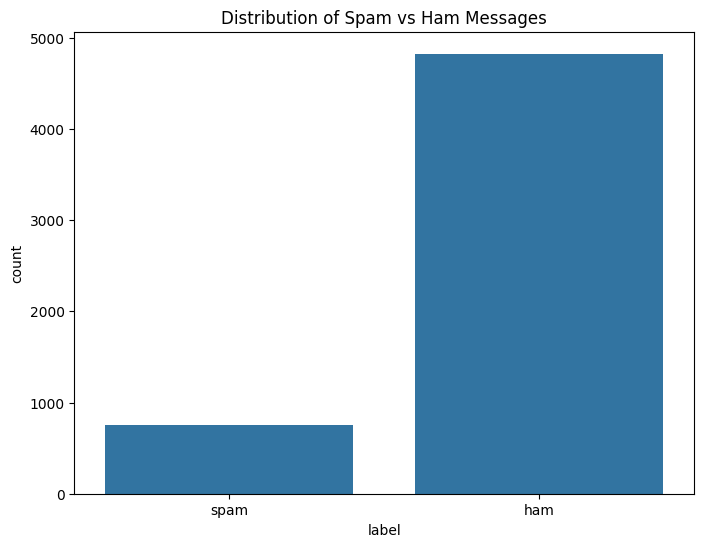

In [ ]:
print("\nClass distribution:")
print(df['label'].value_counts())

# class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

In [ ]:
print("\nPerforming feature extraction using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['message'])
y = df['label_encoded']

print(f"Shape of feature matrix X: {X.shape}")

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Performing feature extraction using TF-IDF...
Shape of feature matrix X: (5574, 5000)
Training set: 4459 samples
Testing set: 1115 samples


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    #a prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    #classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'prediction_time': prediction_time
    }


Training and evaluating KNN model...

--- KNN Results ---
Accuracy: 0.8924
Precision: 1.0000
Recall: 0.2982
F1 Score: 0.4595
Training Time: 0.0026 seconds
Prediction Time: 0.1311 seconds


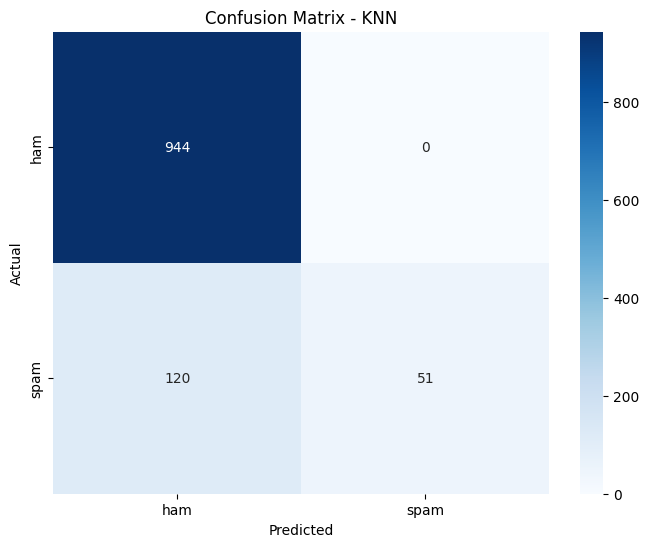


Classification Report:
              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       944
        spam       1.00      0.30      0.46       171

    accuracy                           0.89      1115
   macro avg       0.94      0.65      0.70      1115
weighted avg       0.90      0.89      0.87      1115



In [ ]:
# Block 8: K-Nearest Neighbors Model
print("\nTraining and evaluating KNN model...")
knn = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn, X_train, X_test, y_train, y_test, "KNN")


Training and evaluating Naive Bayes model...

--- Naive Bayes Results ---
Accuracy: 0.9758
Precision: 1.0000
Recall: 0.8421
F1 Score: 0.9143
Training Time: 0.0045 seconds
Prediction Time: 0.0004 seconds


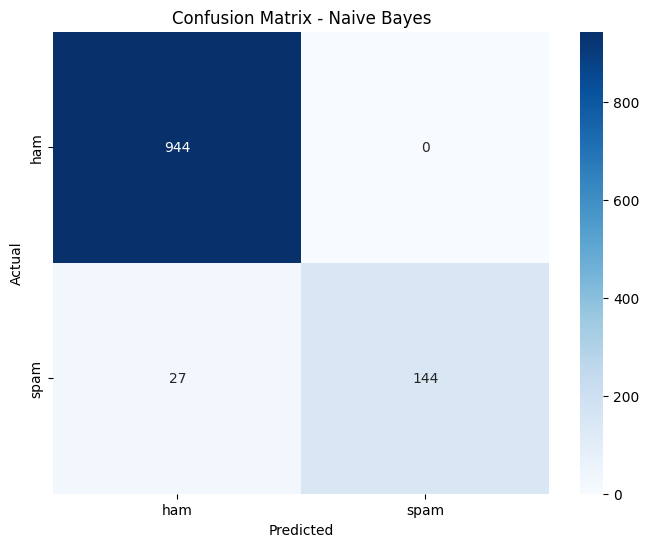


Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       944
        spam       1.00      0.84      0.91       171

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



In [ ]:
# Block 9: Naive Bayes Model
print("\nTraining and evaluating Naive Bayes model...")
nb = MultinomialNB()
nb_results = evaluate_model(nb, X_train, X_test, y_train, y_test, "Naive Bayes")



Training and evaluating Logistic Regression model...

--- Logistic Regression Results ---
Accuracy: 0.9552
Precision: 0.9840
Recall: 0.7193
F1 Score: 0.8311
Training Time: 0.0314 seconds
Prediction Time: 0.0004 seconds


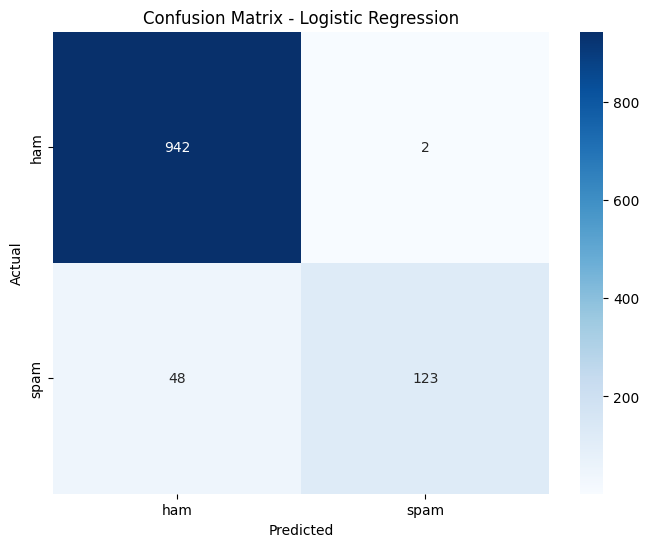


Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       944
        spam       0.98      0.72      0.83       171

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [ ]:
# Logistic Regression Model
print("\nTraining and evaluating Logistic Regression model...")
lr = LogisticRegression(max_iter=1000)
lr_results = evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression")


In [ ]:
# Model Comparison
results = [knn_results, nb_results, lr_results]
results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(results_df[['model_name', 'accuracy', 'precision', 'recall', 'f1', 'training_time', 'prediction_time']])



--- Model Comparison ---
            model_name  accuracy  precision    recall        f1  \
0                  KNN  0.892377      1.000  0.298246  0.459459   
1          Naive Bayes  0.975785      1.000  0.842105  0.914286   
2  Logistic Regression  0.955157      0.984  0.719298  0.831081   

   training_time  prediction_time  
0       0.002589         0.131070  
1       0.004490         0.000412  
2       0.031444         0.000438  


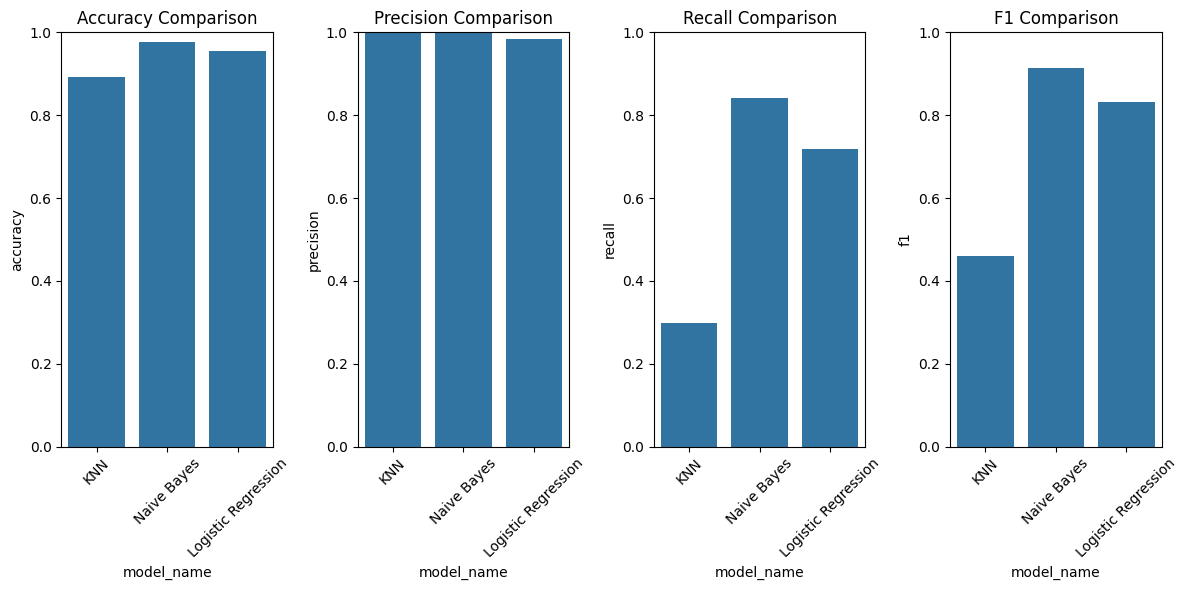

In [ ]:
# Visualize Model Comparison (Performance Metrics)
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i+1)
    sns.barplot(x='model_name', y=metric, data=results_df)
    plt.title(f'{metric.capitalize()} Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

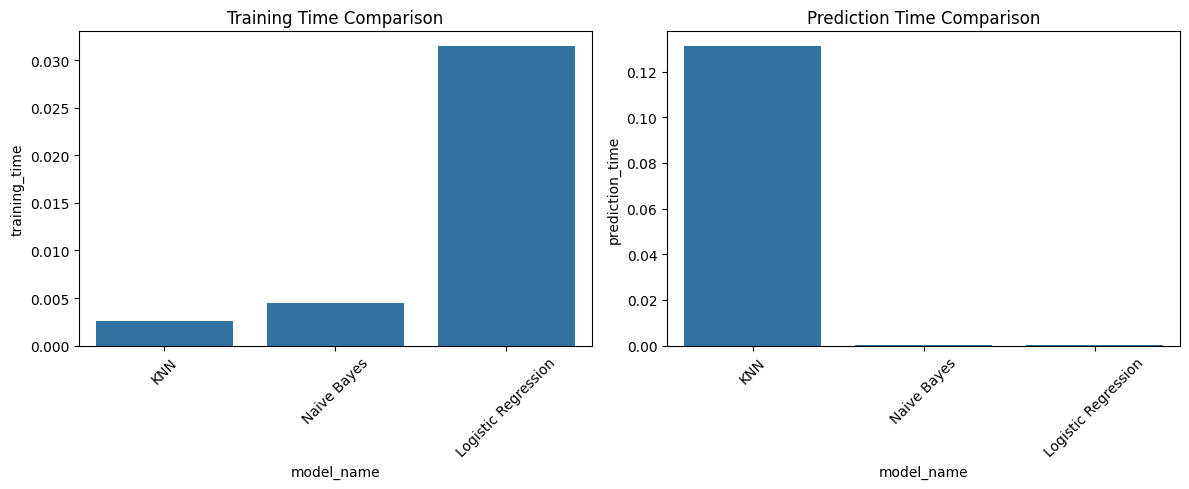

In [ ]:
# Block 13: Visualize Model Comparison (Timing)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='model_name', y='training_time', data=results_df)
plt.title('Training Time Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='model_name', y='prediction_time', data=results_df)
plt.title('Prediction Time Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#  Find the Best Model
best_model_idx = results_df['f1'].idxmax()
best_model = results_df.iloc[best_model_idx]['model_name']
print(f"\nBest model based on F1 score: {best_model}")



Best model based on F1 score: Naive Bayes


In [ ]:
# Create an Improved Function for Predictions
def predict_message(message, vectorizer, model, label_encoder):
    # Transform the message
    message_transformed = vectorizer.transform([message])
    # Predict
    prediction = model.predict(message_transformed)[0]
    # Converting back to original label
    result = label_encoder.inverse_transform([prediction])[0]

    # Print probabilities for debugging (for models that support predict_proba)
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(message_transformed)[0]
        class_labels = label_encoder.classes_
        for i, label in enumerate(class_labels):
            print(f"Probability of '{label}': {proba[i]:.4f}")

    return result

# Get the best model object
if best_model == "KNN":
    best_model_obj = knn
elif best_model == "Naive Bayes":
    best_model_obj = nb
else:
    best_model_obj = lr

In [ ]:
# Test with Example Messages - Improved with more obvious spam examples
print("\nTesting predictions with example messages:")
test_messages = [
    "URGENT! You have won a 1,000,000 pound prize! Call 09061701461 to claim. Texts cost 150p/day.",
    "Hi Mom, what time should I come over for dinner tonight?",
    "FREE entry into our £250 weekly comp just send the word WIN to 80878 FREE entry into our £250 weekly comp",
    "The meeting has been rescheduled to 3pm tomorrow.",
    "CONGRATULATIONS! You've been selected for a FREE iPhone X! Just pay shipping of $1.99. Reply YES to claim now!",
    "Can you pick up some milk on your way home please?"
]

# Check label encoding to make sure we understand what 0 and 1 represent
print("\nLabel encoding check:")
print(f"Class 0 = {le.classes_[0]}")
print(f"Class 1 = {le.classes_[1]}")
print("-" * 50)

# Additional code to verify model is working properly
# Let's check the distribution of predictions on the test set
y_test_pred = best_model_obj.predict(X_test)
print(f"\nTest set prediction distribution:")
test_pred_counts = pd.Series(y_test_pred).value_counts()
for label_value, count in test_pred_counts.items():
    label_name = le.inverse_transform([label_value])[0]
    print(f"{label_name}: {count} ({count/len(y_test)*100:.2f}%)")

print("-" * 50)
print("Model predictions on example messages:")
for message in test_messages:
    prediction = predict_message(message, tfidf_vectorizer, best_model_obj, le)
    print(f"\nMessage: {message}")
    print(f"Prediction: {prediction}")
    print("-" * 30)


Testing predictions with example messages:

Label encoding check:
Class 0 = ham
Class 1 = spam
--------------------------------------------------

Test set prediction distribution:
ham: 971 (87.09%)
spam: 144 (12.91%)
--------------------------------------------------
Model predictions on example messages:
Probability of 'ham': 0.0226
Probability of 'spam': 0.9774

Message: URGENT! You have won a 1,000,000 pound prize! Call 09061701461 to claim. Texts cost 150p/day.
Prediction: spam
------------------------------
Probability of 'ham': 0.9983
Probability of 'spam': 0.0017

Message: Hi Mom, what time should I come over for dinner tonight?
Prediction: ham
------------------------------
Probability of 'ham': 0.0805
Probability of 'spam': 0.9195

Message: FREE entry into our £250 weekly comp just send the word WIN to 80878 FREE entry into our £250 weekly comp
Prediction: spam
------------------------------
Probability of 'ham': 0.9905
Probability of 'spam': 0.0095

Message: The meeting has

In [ ]:
# Try Your Own Messages - Interactive
your_message = input("Enter a message to classify: ")
result = predict_message(your_message, tfidf_vectorizer, best_model_obj, le)
print(f"The message is classified as: {result}")

Enter a message to classify: sms.su  23456 free recharge
Probability of 'ham': 0.7199
Probability of 'spam': 0.2801
The message is classified as: ham


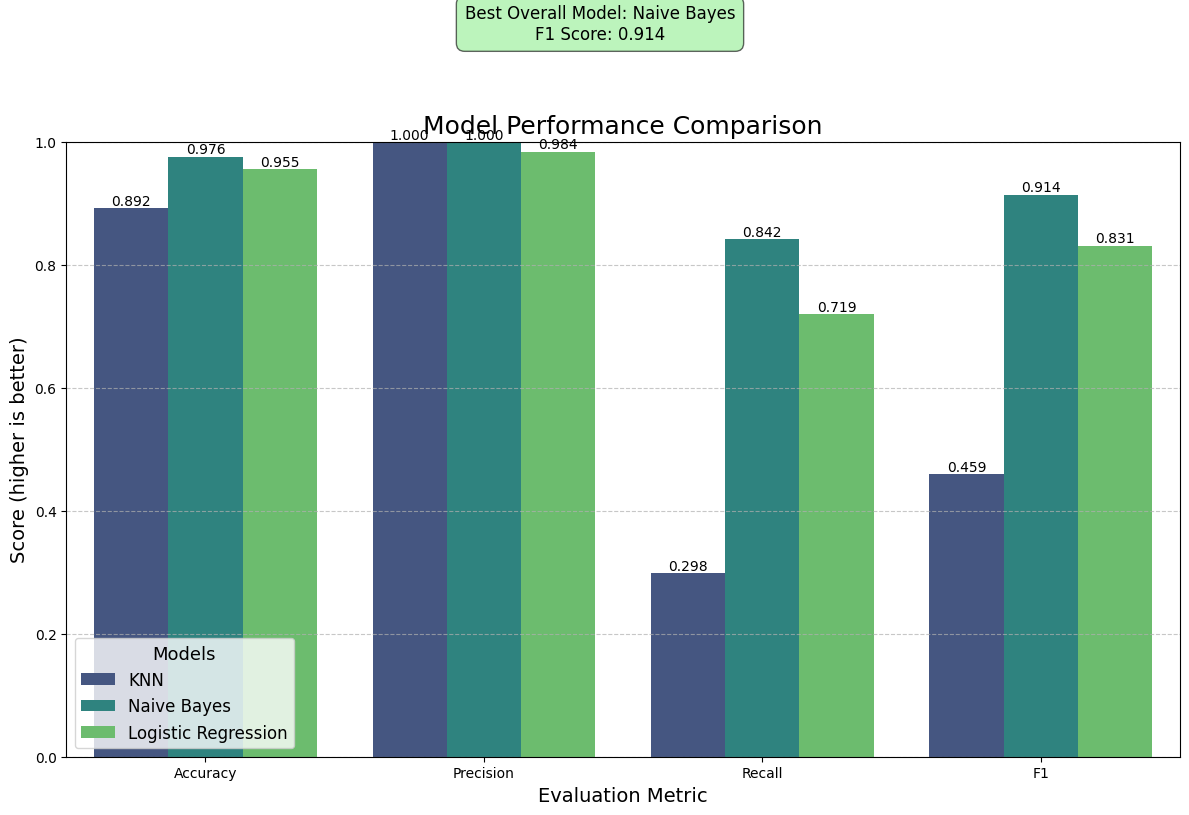


Model Performance Metrics Summary:
                     accuracy  precision  recall      f1
model_name                                              
KNN                    0.8924      1.000  0.2982  0.4595
Naive Bayes            0.9758      1.000  0.8421  0.9143
Logistic Regression    0.9552      0.984  0.7193  0.8311

Time Performance (seconds):
                     training_time  prediction_time  total_time
model_name                                                     
Naive Bayes                 0.0045           0.0004      0.0049
Logistic Regression         0.0314           0.0004      0.0319
KNN                         0.0026           0.1311      0.1337

----------------------------------------------------
RECOMMENDATION: Naive Bayes
----------------------------------------------------
This model provides the best overall performance for your spam detection task based on F1 score.


<ipython-input-54-c9553cea23d4>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['total_time'] = time_df['training_time'] + time_df['prediction_time']


In [ ]:
#  Single Comprehensive Comparison Graph

# Create a summary dataframe with all performance metrics
comparison_df = results_df[['model_name', 'accuracy', 'precision', 'recall', 'f1']]

# Reshape the data for easier plotting
plot_data = pd.melt(comparison_df,
                    id_vars=['model_name'],
                    value_vars=['accuracy', 'precision', 'recall', 'f1'],
                    var_name='Metric',
                    value_name='Score')

# Capitalize metric names for better presentation
plot_data['Metric'] = plot_data['Metric'].str.capitalize()

# Create a single comprehensive bar chart
plt.figure(figsize=(12, 8))
chart = sns.barplot(x='Metric', y='Score', hue='model_name', data=plot_data, palette='viridis')

# Enhance the chart appearance
plt.title('Model Performance Comparison', fontsize=18)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.ylabel('Score (higher is better)', fontsize=14)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 for percentage metrics
plt.legend(title='Models', fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for container in chart.containers:
    chart.bar_label(container, fmt='%.3f', fontsize=10)

# Add overall best model annotation
best_model_name = results_df.loc[results_df['f1'].idxmax(), 'model_name']
best_f1 = results_df.loc[results_df['f1'].idxmax(), 'f1']
plt.annotate(f'Best Overall Model: {best_model_name}\nF1 Score: {best_f1:.3f}',
             xy=(0.5, 0.97), xycoords='figure fraction',
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen', alpha=0.6),
             ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Print additional comparison information
print("\nModel Performance Metrics Summary:")
print(comparison_df.set_index('model_name').round(4))

# Print time comparison
time_df = results_df[['model_name', 'training_time', 'prediction_time']]
time_df['total_time'] = time_df['training_time'] + time_df['prediction_time']
time_df = time_df.sort_values('total_time')
print("\nTime Performance (seconds):")
print(time_df.set_index('model_name').round(4))

# Print final recommendation
print(f"\n----------------------------------------------------")
print(f"RECOMMENDATION: {best_model_name}")
print(f"----------------------------------------------------")
print(f"This model provides the best overall performance for your spam detection task based on F1 score.")